<a href="https://colab.research.google.com/github/fairuznawar122/Solar-Radiation-Forecast/blob/main/Solar_Radiation_Forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reading A Single Data File

In [ ]:
# @title
import pandas as pd

url = "https://raw.githubusercontent.com/fairuznawar122/Solar-Radiation-Forecast/refs/heads/main/4.csv"

# Most robust solution
df = pd.read_csv(url,
                 quotechar='"',   # Explicitly declare quote character
                 escapechar='\\', # Handle escaped quotes
                 engine='python') # More tolerant parser

df

# 78888 (Length of 1.csv)
# 43824 (Length of 2.csv)
# 43848 (Length of 3.csv)
# 37968 (Length of 4.csv)

Merging All of the Data into one Data File

In [ ]:
# @title
import pandas as pd

urls = [
    "https://raw.githubusercontent.com/fairuznawar122/Solar-Radiation-Forecast/refs/heads/main/1.csv",
    "https://raw.githubusercontent.com/fairuznawar122/Solar-Radiation-Forecast/refs/heads/main/2.csv",
    "https://raw.githubusercontent.com/fairuznawar122/Solar-Radiation-Forecast/refs/heads/main/3.csv",
    "https://raw.githubusercontent.com/fairuznawar122/Solar-Radiation-Forecast/refs/heads/main/4.csv"
]

dfs = []
for i, url in enumerate(urls):
    df = pd.read_csv(url)
    dfs.append(df)

merged = pd.concat(dfs)
merged = merged.reset_index(drop=True)

In [ ]:
# @title
import pandas as pd

merged.to_csv('merged_data.csv', index=False)  # index=False avoids extra index column
print("Saved successfully as 'merged_data.csv'")

Saved successfully as 'merged_data.csv'


In [ ]:
# @title
from google.colab import files
files.download('merged_data.csv')  # Triggers automatic download

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Loading the main Dataframe

In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/fairuznawar122/Solar-Radiation-Forecast/refs/heads/main/merged_data.csv"

# Most robust solution
df = pd.read_csv(url,
                 quotechar='"',   # Explicitly declare quote character
                 escapechar='\\', # Handle escaped quotes
                 engine='python') # More tolerant parser

df

,YEAR,MO,DY,HR,SZA,T2M,T2MDEW,QV2M,RH2M,PRECTOTCORR,WS10M,WD10M,WS50M,WD50M,ALLSKY_SFC_SW_DWN
0,2001,4,1,0,90.0,-3.98,-11.55,2.30,54.28,0.0,2.96,65.0,4.40,66.0,0.0
1,2001,4,1,1,90.0,-4.25,-11.20,2.37,57.18,0.0,3.08,61.0,4.67,61.7,0.0
2,2001,4,1,2,90.0,-4.46,-11.09,2.40,58.92,0.0,3.14,55.5,4.87,56.2,0.0
3,2001,4,1,3,90.0,-4.58,-11.08,2.40,59.52,0.0,3.17,49.0,4.97,49.6,0.0
4,2001,4,1,4,90.0,-4.63,-11.10,2.39,59.54,0.0,3.22,43.6,5.11,44.3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204523,2024,7,30,19,90.0,11.21,2.75,7.16,55.88,0.0,4.47,25.1,7.41,25.3,0.0
204524,2024,7,30,20,90.0,9.70,3.14,7.36,63.56,0.0,5.06,32.4,7.67,32.9,0.0
204525,2024,7,30,21,90.0,8.32,3.39,7.49,71.00,0.0,4.76,35.0,7.44,35.2,0.0
204526,2024,7,30,22,90.0,7.20,3.31,7.45,76.21,0.0,4.34,36.1,7.19,36.5,0.0


Checking for missing values

In [2]:
# Count -999 values in entire DataFrame
missing_count = (df == -999).sum().sum()
print(f"Total -999 values found: {missing_count}")

# Count per column
print("\n-999 values per column:")
print((df == -999).sum())

Total -999 values found: 12

-999 values per column:
YEAR                 0
MO                   0
DY                   0
HR                   0
SZA                  6
T2M                  0
T2MDEW               0
QV2M                 0
RH2M                 0
PRECTOTCORR          0
WS10M                0
WD10M                0
WS50M                0
WD50M                0
ALLSKY_SFC_SW_DWN    6
dtype: int64


In [3]:
# Case 1: If column is named 'SZA' (exact match)
sza_missing = df[df['SZA'] == -999]

# Case 2: If column name might vary (e.g., 'sza', 'Solar_Zenith_Angle')
sza_col = [col for col in df.columns if 'sza' in col.lower()][0]  # Finds first matching column
sza_missing = df[df[sza_col] == -999]
print(f"Found {len(sza_missing)} rows with SZA = -999")
display(sza_missing.head())  # Show first few rows

Found 6 rows with SZA = -999


,YEAR,MO,DY,HR,SZA,T2M,T2MDEW,QV2M,RH2M,PRECTOTCORR,WS10M,WD10M,WS50M,WD50M,ALLSKY_SFC_SW_DWN
199800,2024,1,16,0,-999.0,-13.45,-13.00,2.02,100.0,0.0,1.99,253.9,3.27,253.7,-999.0
199801,2024,1,16,1,-999.0,-13.76,-13.18,1.98,100.0,0.0,1.72,274.0,2.74,272.1,-999.0
199802,2024,1,16,2,-999.0,-14.13,-13.49,1.93,100.0,0.0,1.45,310.3,2.20,306.1,-999.0
199803,2024,1,16,3,-999.0,-14.82,-13.92,1.86,100.0,0.0,1.69,352.5,2.36,350.7,-999.0
199804,2024,1,16,4,-999.0,-15.88,-14.65,1.76,100.0,0.0,2.19,15.4,3.05,14.4,-999.0


In [4]:
#Deleting the entire 16th Feb, 2024 for some missing values
delete_condition = (
    (df['YEAR'] == 2024) &
    (df['MO'] == 1) &
    (df['DY'] == 16) &
    (df['HR'].between(0, 23))
)

Deleting the missing values

In [5]:
# Get the indices of rows to be dropped
indices_to_drop = df[delete_condition].index

# Extract the rows BEFORE dropping them
dropped_rows = df.loc[indices_to_drop]  # This gives you the 96 rows being removed

# Verify
print(f"Rows being dropped: {len(dropped_rows)}")
display(dropped_rows.head())

# Now perform the actual drop
df = df.drop(indices_to_drop)
print(len(df))

Rows being dropped: 24


,YEAR,MO,DY,HR,SZA,T2M,T2MDEW,QV2M,RH2M,PRECTOTCORR,WS10M,WD10M,WS50M,WD50M,ALLSKY_SFC_SW_DWN
199800,2024,1,16,0,-999.0,-13.45,-13.00,2.02,100.0,0.0,1.99,253.9,3.27,253.7,-999.0
199801,2024,1,16,1,-999.0,-13.76,-13.18,1.98,100.0,0.0,1.72,274.0,2.74,272.1,-999.0
199802,2024,1,16,2,-999.0,-14.13,-13.49,1.93,100.0,0.0,1.45,310.3,2.20,306.1,-999.0
199803,2024,1,16,3,-999.0,-14.82,-13.92,1.86,100.0,0.0,1.69,352.5,2.36,350.7,-999.0
199804,2024,1,16,4,-999.0,-15.88,-14.65,1.76,100.0,0.0,2.19,15.4,3.05,14.4,-999.0


204504


In [6]:
df= df.rename(columns={'ALLSKY_SFC_SW_DWN': 'GHI'})
df

,YEAR,MO,DY,HR,SZA,T2M,T2MDEW,QV2M,RH2M,PRECTOTCORR,WS10M,WD10M,WS50M,WD50M,GHI
0,2001,4,1,0,90.0,-3.98,-11.55,2.30,54.28,0.0,2.96,65.0,4.40,66.0,0.0
1,2001,4,1,1,90.0,-4.25,-11.20,2.37,57.18,0.0,3.08,61.0,4.67,61.7,0.0
2,2001,4,1,2,90.0,-4.46,-11.09,2.40,58.92,0.0,3.14,55.5,4.87,56.2,0.0
3,2001,4,1,3,90.0,-4.58,-11.08,2.40,59.52,0.0,3.17,49.0,4.97,49.6,0.0
4,2001,4,1,4,90.0,-4.63,-11.10,2.39,59.54,0.0,3.22,43.6,5.11,44.3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204523,2024,7,30,19,90.0,11.21,2.75,7.16,55.88,0.0,4.47,25.1,7.41,25.3,0.0
204524,2024,7,30,20,90.0,9.70,3.14,7.36,63.56,0.0,5.06,32.4,7.67,32.9,0.0
204525,2024,7,30,21,90.0,8.32,3.39,7.49,71.00,0.0,4.76,35.0,7.44,35.2,0.0
204526,2024,7,30,22,90.0,7.20,3.31,7.45,76.21,0.0,4.34,36.1,7.19,36.5,0.0


### Adding Time Features

**Calculating Day of the Year**

In [7]:
import pandas as pd
dayoftheyear= pd.DataFrame()
# Assuming df has 'month' and 'day' columns
dayoftheyear['date'] = pd.to_datetime(df['YEAR'].astype(str) + '-' +
                           df['MO'].astype(str) + '-' +
                           df['DY'].astype(str))

dayoftheyear['day_of_year'] = dayoftheyear['date'].dt.dayofyear
dayoftheyear

,date,day_of_year
0,2001-04-01,91
1,2001-04-01,91
2,2001-04-01,91
3,2001-04-01,91
4,2001-04-01,91
...,...,...
204523,2024-07-30,212
204524,2024-07-30,212
204525,2024-07-30,212
204526,2024-07-30,212


**Dsin-Dcos Calculations**

In [8]:
cyclic_features = pd.DataFrame()

In [9]:
import numpy as np
def is_leap_year(year):
    return (year % 4 == 0) & ((year % 100 != 0) | (year % 400 == 0))

# Then apply it
dayoftheyear['max_days'] = df['YEAR'].apply(
    lambda y: 366 if is_leap_year(y) else 365
)

cyclic_features['dsin'] = np.sin(2 * np.pi * dayoftheyear['day_of_year'] / dayoftheyear['max_days'])
cyclic_features['dcos'] = np.cos(2 * np.pi * dayoftheyear['day_of_year'] / dayoftheyear['max_days'])

In [10]:
import numpy as np

# 'Hour' column contains (0-23)
cyclic_features['tsin'] = np.sin(2 * np.pi * df['HR'] / 24)
cyclic_features['tcos'] = np.cos(2 * np.pi * df['HR'] / 24)

In [ ]:
cyclic_features

,dsin,dcos
0,0.999991,0.004304
1,0.999991,0.004304
2,0.999991,0.004304
3,0.999991,0.004304
4,0.999991,0.004304
...,...,...
204523,-0.477536,-0.878612
204524,-0.477536,-0.878612
204525,-0.477536,-0.878612
204526,-0.477536,-0.878612


In [11]:
df.drop(columns=['YEAR','MO','DY','HR'], inplace=True)

In [ ]:
df

,SZA,T2M,T2MDEW,QV2M,RH2M,PRECTOTCORR,WS10M,WD10M,WS50M,WD50M,GHI
0,90.0,-3.98,-11.55,2.30,54.28,0.0,2.96,65.0,4.40,66.0,0.0
1,90.0,-4.25,-11.20,2.37,57.18,0.0,3.08,61.0,4.67,61.7,0.0
2,90.0,-4.46,-11.09,2.40,58.92,0.0,3.14,55.5,4.87,56.2,0.0
3,90.0,-4.58,-11.08,2.40,59.52,0.0,3.17,49.0,4.97,49.6,0.0
4,90.0,-4.63,-11.10,2.39,59.54,0.0,3.22,43.6,5.11,44.3,0.0
...,...,...,...,...,...,...,...,...,...,...,...
204523,90.0,11.21,2.75,7.16,55.88,0.0,4.47,25.1,7.41,25.3,0.0
204524,90.0,9.70,3.14,7.36,63.56,0.0,5.06,32.4,7.67,32.9,0.0
204525,90.0,8.32,3.39,7.49,71.00,0.0,4.76,35.0,7.44,35.2,0.0
204526,90.0,7.20,3.31,7.45,76.21,0.0,4.34,36.1,7.19,36.5,0.0


In [ ]:
# X = df.drop(columns=['YEAR','MO','DY','HR','GHI','dsin','dcos','tsin','tcos'])  # All columns except target
# y = df['GHI']
# cyclic_features = ['dsin', 'dcos', 'tsin', 'tcos']

# APPLYING RNN


In [16]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# 1. Split into feature matrix X_data and target vector y_data
feature_cols = [c for c in df.columns if c != 'GHI']
X_data = df[feature_cols].values    # shape: (n_samples, n_features)
y_data = df['GHI'].values.reshape(-1, 1)  # shape: (n_samples, 1)

# 2. Scale features and target separately
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X = scaler_X.fit_transform(X_data)
y = scaler_y.fit_transform(y_data)

# # 3. Create rolling sequences
# def create_sequences(X, y, seq_len):
#     Xs, ys = [], []
#     for i in range(len(X) - seq_len):
#         Xs.append(X[i : i + seq_len])
#         ys.append(y[i + seq_len])
#     return np.array(Xs), np.array(ys)

# seq_length = 12  # e.g. look back 10 time steps
# X, y = create_sequences(X_scaled, y_scaled, seq_length)
# # X.shape == (n_samples - seq_length, seq_length, n_features)
# # y.shape == (n_samples - seq_length, 1)

# # 4. Train/Test split
# split = int(0.8 * len(X))
# X_train, X_test = X[:split], X[split:]
# y_train, y_test = y[:split], y[split:]

# # 5. Build & compile SimpleRNN model
# n_features = X.shape[2]
# model = Sequential([
#     SimpleRNN(50, activation='tanh', input_shape=(seq_length, n_features)),
#     Dense(1)
# ])
# model.compile(optimizer='adam', loss='mse')

# # 6. Train
# model.fit(
#     X_train, y_train,
#     epochs=50,
#     batch_size=16,
#     validation_split=0.1,
#     verbose=2
# )

# # 7. Predict & invert scaling
# y_pred_scaled = model.predict(X_test)
# y_pred = scaler_y.inverse_transform(y_pred_scaled)
# y_true = scaler_y.inverse_transform(y_test)

# # 8. (Optional) Evaluate
# from sklearn.metrics import mean_squared_error
# rmse = np.sqrt(mean_squared_error(y_true, y_pred))
# print(f"Test RMSE on GHI: {rmse:.3f}")


RNN Results-

1. epochs=50,
    batch_size=16,
    validation_split=0.1,
    verbose=2, seq_length = 10 || RMSE = 66.316
2. epochs=50,
    batch_size=16,
    validation_split=0.1,
    verbose=2, seq_length = 12 || RMSE = 64.764
3. epochs=50,
    batch_size=16,
    validation_split=0.1,
    verbose=2, seq_length = 18 || RMSE = 66.134
4. epochs=50,
    batch_size=16,
    validation_split=0.1,
    verbose=2, seq_length = 24 || RMSE = 64.098
5. epochs=50,
    batch_size=16,
    validation_split=0.1,
    verbose=2, seq_length = 48 || RMSE = 64.434

In [19]:
X.shape

(204504, 10)

In [21]:
# 1. (unchanged) Scale X_data, y_data → X, y
# … your scaler_X.fit_transform/X and scaler_y …

# 2. Create sequences
def create_sequences(X, y, seq_len):
    Xs, ys = [], []
    for i in range(len(X) - seq_len):
        Xs.append(X[i : i + seq_len])
        ys.append(y[i + seq_len])
    return np.array(Xs), np.array(ys)

seq_length = 24
X_seq, y_seq = create_sequences(X, y, seq_length)
# now X_seq.shape == (n_samples - seq_len, seq_len, n_features)
#     y_seq.shape == (n_samples - seq_len, 1)

# 3. 70/15/15 split on sequenced data
n_samples = len(X_seq)
train_end = int(0.70 * n_samples)
val_end   = train_end + int(0.15 * n_samples)

X_train,  y_train  = X_seq[:train_end],  y_seq[:train_end]
X_val,    y_val    = X_seq[train_end:val_end],  y_seq[train_end:val_end]
X_test,   y_test   = X_seq[val_end:],    y_seq[val_end:]

# 4. Build & compile
n_features = X_seq.shape[2]
model = Sequential([
    SimpleRNN(50, activation='tanh', input_shape=(seq_length, n_features)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

# 5. Train with explicit validation_data
model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=16,
    validation_data=(X_val, y_val),
    verbose=2
)

# 6. Evaluate on unseen test set
y_pred_scaled = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_true = scaler_y.inverse_transform(y_test)

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print(f"Final Test RMSE on GHI: {rmse:.3f}")


Epoch 1/50
8946/8946 - 42s - 5ms/step - loss: 0.0053 - val_loss: 0.0041
Epoch 2/50
8946/8946 - 41s - 5ms/step - loss: 0.0040 - val_loss: 0.0036
Epoch 3/50
8946/8946 - 40s - 4ms/step - loss: 0.0037 - val_loss: 0.0037
Epoch 4/50
8946/8946 - 42s - 5ms/step - loss: 0.0036 - val_loss: 0.0038
Epoch 5/50
8946/8946 - 40s - 4ms/step - loss: 0.0035 - val_loss: 0.0033
Epoch 6/50
8946/8946 - 40s - 5ms/step - loss: 0.0035 - val_loss: 0.0033
Epoch 7/50
8946/8946 - 40s - 4ms/step - loss: 0.0034 - val_loss: 0.0032
Epoch 8/50
8946/8946 - 41s - 5ms/step - loss: 0.0040 - val_loss: 0.0034
Epoch 9/50
8946/8946 - 40s - 4ms/step - loss: 0.0037 - val_loss: 0.0041
Epoch 10/50
8946/8946 - 42s - 5ms/step - loss: 0.0035 - val_loss: 0.0033
Epoch 11/50
8946/8946 - 41s - 5ms/step - loss: 0.0035 - val_loss: 0.0032
Epoch 12/50
8946/8946 - 39s - 4ms/step - loss: 0.0034 - val_loss: 0.0036
Epoch 13/50
8946/8946 - 40s - 4ms/step - loss: 0.0034 - val_loss: 0.0033
Epoch 14/50
8946/8946 - 39s - 4ms/step - loss: 0.0033 - val_

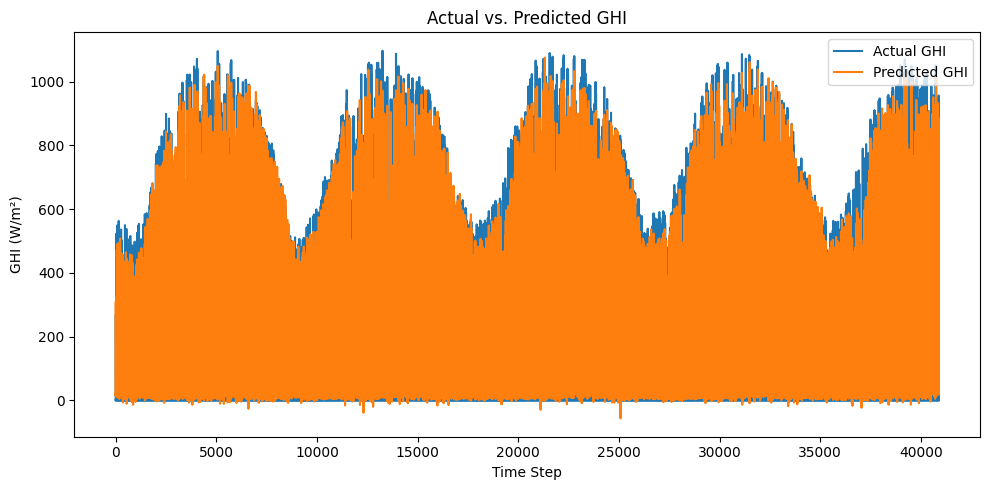

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(y_true, label='Actual GHI')
plt.plot(y_pred, label='Predicted GHI')
plt.xlabel('Time Step')
plt.ylabel('GHI (W/m²)')
plt.title('Actual vs. Predicted GHI')
plt.legend()
plt.tight_layout()
plt.show()


## Feature Importance with RF

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y.values.reshape(-1, 1))


X_scaler = StandardScaler()
X_base_scaled = X_scaler.fit_transform(X)
X_train_scaled = np.hstack([X_base_scaled, df[cyclic_features].values])

print("Scaled data shape:", X_train_scaled.shape)
X_train_scaled

Scaled data shape: (204504, 14)
First row: [ 0.76438073 -0.34262724  0.05775635 -0.25838516  0.45484645 -0.20138431
 -0.24460047 -1.14803744 -0.02207399 -1.16922343  0.99999074  0.00430354
  0.          1.        ]


array([[ 0.76438073, -0.34262724,  0.05775635, ...,  0.00430354,
         0.        ,  1.        ],
       [ 0.76438073, -0.36784242,  0.09319599, ...,  0.00430354,
         0.25881905,  0.96592583],
       [ 0.76438073, -0.38745423,  0.10433417, ...,  0.00430354,
         0.5       ,  0.8660254 ],
       ...,
       [ 0.76438073,  0.80606434,  1.57052284, ..., -0.87861225,
        -0.70710678,  0.70710678],
       [ 0.76438073,  0.70146803,  1.56242235, ..., -0.87861225,
        -0.5       ,  0.8660254 ],
       [ 0.76438073,  0.60714458,  1.54318368, ..., -0.87861225,
        -0.25881905,  0.96592583]])

In [ ]:
# Train model
model = RandomForestRegressor()
model.fit(X_train_scaled, y_train_scaled.ravel())

RandomForestRegressor()

In [ ]:
# Get raw importance values (array)
importance_values = model.feature_importances_

# Original DataFrame columns
original_columns = X.columns.tolist()
all_columns = original_columns + cyclic_features

# Pair with feature names (if X is a DataFrame)
importance_df = pd.DataFrame({
    'Feature': all_columns,
    'Importance': importance_values
})

# Sort by importance (descending)
importance_df = importance_df.sort_values('Importance', ascending=False)
print(importance_df)

        Feature  Importance
0           SZA    0.891414
4          RH2M    0.038701
5   PRECTOTCORR    0.027520
1           T2M    0.006961
10         dsin    0.004667
6         WS10M    0.004143
7         WD10M    0.004135
8         WS50M    0.003971
12         tsin    0.003959
9         WD50M    0.003944
11         dcos    0.003764
2        T2MDEW    0.003255
3          QV2M    0.002914
13         tcos    0.000653
